In [1]:
import random

# สุ่มตัวเลข 10 ตัวในช่วง 0 ถึง 100
random_numbers = [random.randint(0, 100) for _ in range(10)]

print(random_numbers)

[50, 35, 87, 8, 6, 67, 49, 29, 43, 23]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# สร้างข้อมูลจำลองแบบ 2D (2 Features)
# X = [[50, 35],[87, 8],[6, 67],[ 49, 29],[43, 23]]
# y = [1,0,1,0,1]
X, y = make_classification(
    n_samples=200, n_features=2, n_classes=2, 
    n_informative=2, n_redundant=0, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ฟังก์ชันช่วย Plot ข้อมูล
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

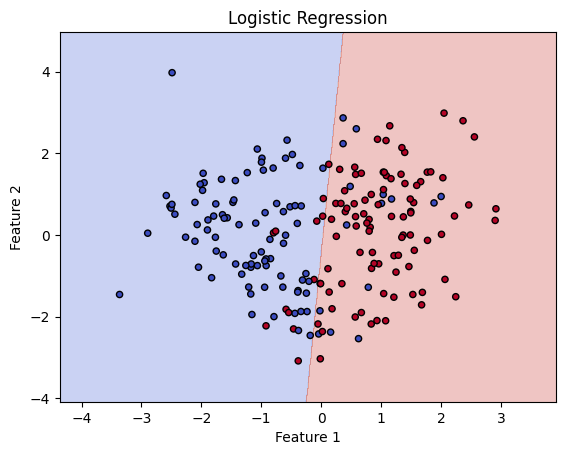

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[26  6]
 [ 4 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.80      0.86      0.83        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



In [4]:
from sklearn.linear_model import LogisticRegression

# โมเดล Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลและ Plot
plot_decision_boundary(model, X, y, "Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


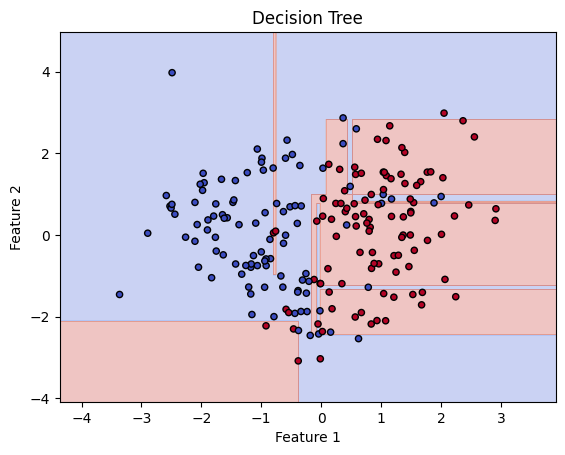

Accuracy: 0.8
Confusion Matrix:
 [[27  5]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.81      0.75      0.78        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [5]:
from sklearn.tree import DecisionTreeClassifier

# โมเดล Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลและ Plot
plot_decision_boundary(model, X, y, "Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

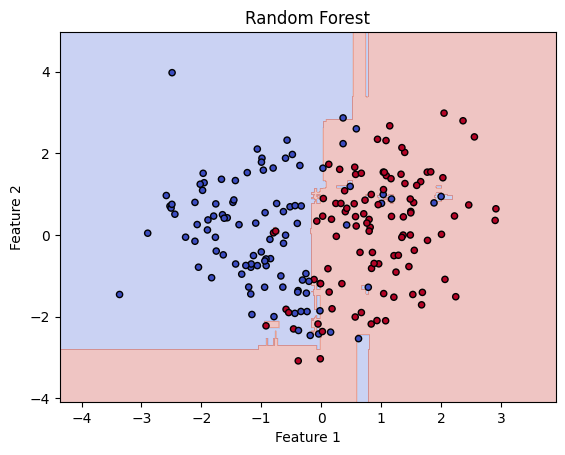

Accuracy: 0.8666666666666667
Confusion Matrix:
 [[27  5]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.83      0.89      0.86        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [6]:
from sklearn.ensemble import RandomForestClassifier

# โมเดล Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลและ Plot
plot_decision_boundary(model, X, y, "Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


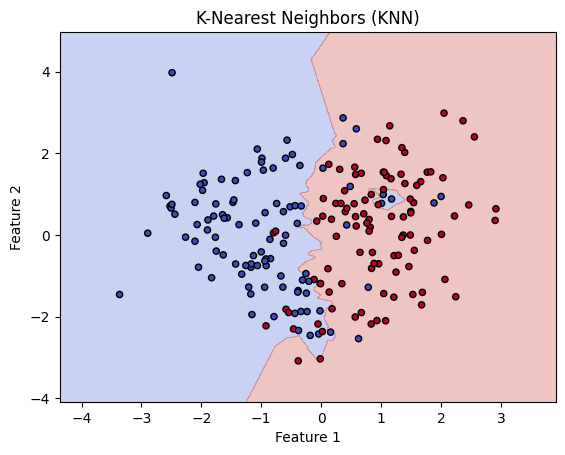

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[27  5]
 [ 5 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [7]:
from sklearn.neighbors import KNeighborsClassifier

# โมเดล KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลและ Plot
plot_decision_boundary(model, X, y, "K-Nearest Neighbors (KNN)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


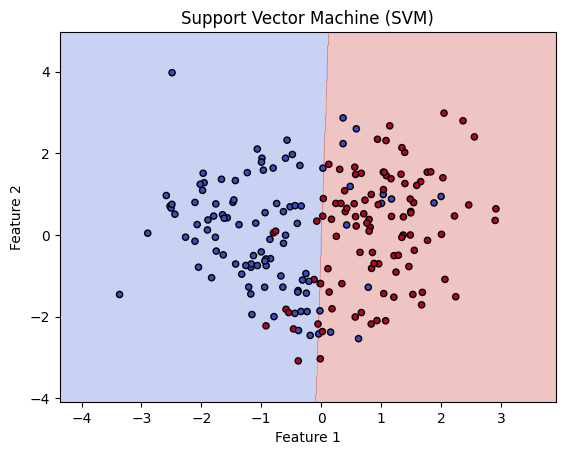

Accuracy: 0.8166666666666667
Confusion Matrix:
 [[26  6]
 [ 5 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [12]:
from sklearn.svm import SVC

# โมเดล SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลและ Plot
plot_decision_boundary(model, X, y, "Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\User\ai-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


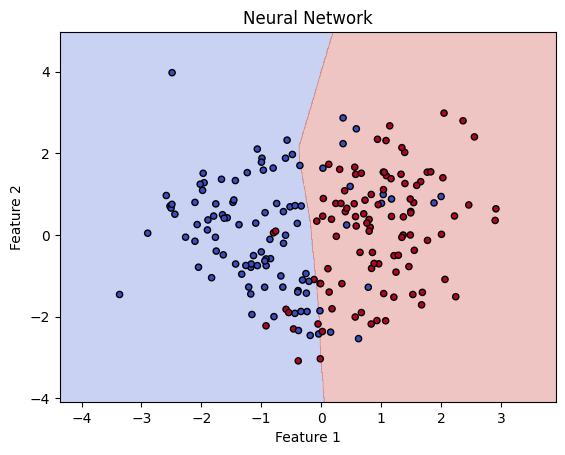

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[27  5]
 [ 5 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [9]:
from sklearn.neural_network import MLPClassifier

# โมเดล Neural Network
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลและ Plot
plot_decision_boundary(model, X, y, "Neural Network")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\User\ai-env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:29:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


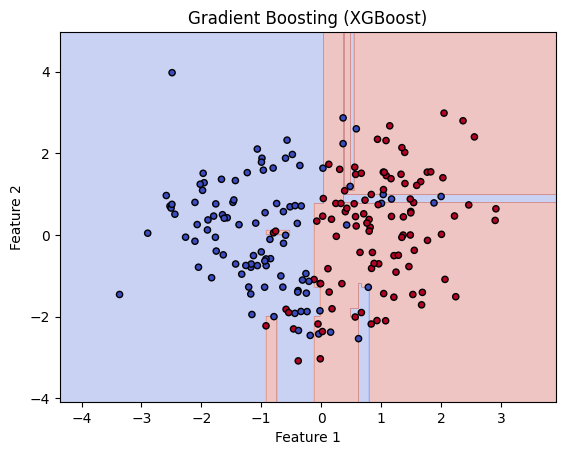

Accuracy: 0.8
Confusion Matrix:
 [[26  6]
 [ 6 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [10]:
from xgboost import XGBClassifier

# โมเดล XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลและ Plot
plot_decision_boundary(model, X, y, "Gradient Boosting (XGBoost)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
